In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Input, Rescaling, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
path = "/kaggle/input/images-rdts"

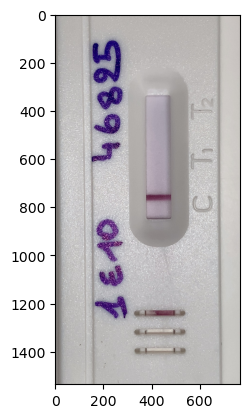

In [4]:
plt.imshow(plt.imread(path + '/NEGATIVE/JPEG image-08B1EEC706E7-10.jpeg'));

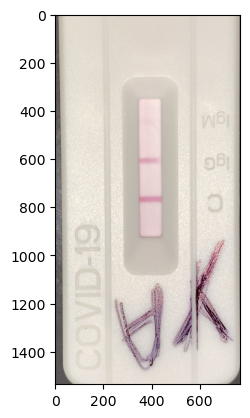

In [5]:
plt.imshow(plt.imread(path + '/POSITIVE/JPEG image-0885EC1F25E4-1.jpeg'));

In [6]:
# Check image size
plt.imread(path + '/NEGATIVE/JPEG image-08B1EEC706E7-10.jpeg').shape

(1536, 768, 3)

In [7]:
train_data = image_dataset_from_directory(
    path,
    image_size = (224, 224),
    seed = 42,
    subset = 'training',
    validation_split = 0.2
)

test_data = image_dataset_from_directory(
    path,
    image_size = (224, 224),
    seed = 42,
    subset = 'validation',
    validation_split = 0.2
)

Found 2538 files belonging to 2 classes.
Using 2031 files for training.
Found 2538 files belonging to 2 classes.
Using 507 files for validation.


In [8]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [9]:
effnet = EfficientNetB0(include_top = False, weights = 'imagenet')

16705208/16705208 [==============================] - 1s 0us/step


In [10]:
effnet.trainable = False

In [11]:
model_t = Sequential()
model_t.add(effnet)
model_t.add(GlobalAveragePooling2D())
model_t.add(Dense(1, activation='sigmoid'))

In [12]:
model_t.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 1,281
Non-trainable params: 4,049,571
_________________________________________________________________


In [13]:
model_t.compile(optimizer=Adam(learning_rate=0.0001), loss='bce', metrics=['acc'])

In [14]:
history = model_t.fit(
    train_data,
    validation_data=test_data,
    epochs=100
)

Epoch 1/100


2023-06-20 22:23:13.715941: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


64/64 [==============================] - 36s 328ms/step - loss: 0.6268 - acc: 0.6716 - val_loss: 0.6090 - val_acc: 0.6726
Epoch 2/100
64/64 [==============================] - 17s 240ms/step - loss: 0.5978 - acc: 0.6864 - val_loss: 0.5843 - val_acc: 0.7160
Epoch 3/100
64/64 [==============================] - 16s 223ms/step - loss: 0.5765 - acc: 0.7233 - val_loss: 0.5619 - val_acc: 0.7594
Epoch 4/100
64/64 [==============================] - 17s 236ms/step - loss: 0.5546 - acc: 0.7681 - val_loss: 0.5426 - val_acc: 0.7850
Epoch 5/100
64/64 [==============================] - 16s 224ms/step - loss: 0.5375 - acc: 0.7750 - val_loss: 0.5243 - val_acc: 0.8067
Epoch 6/100
64/64 [==============================] - 16s 234ms/step - loss: 0.5216 - acc: 0.7981 - val_loss: 0.5087 - val_acc: 0.8028
Epoch 7/100
64/64 [==============================] - 16s 225ms/step - loss: 0.5086 - acc: 0.7976 - val_loss: 0.4938 - val_acc: 0.8166
Epoch 8/100
64/64 [==============================] - 16s 234ms/step - loss

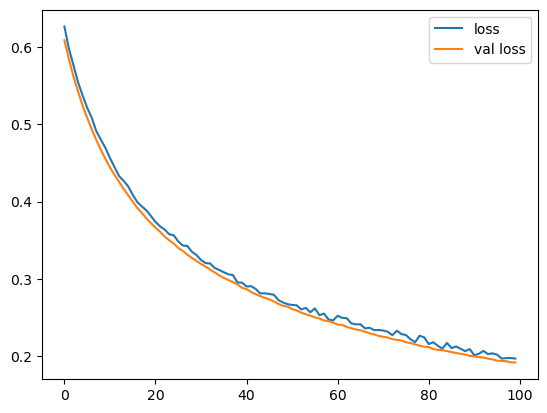

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend();

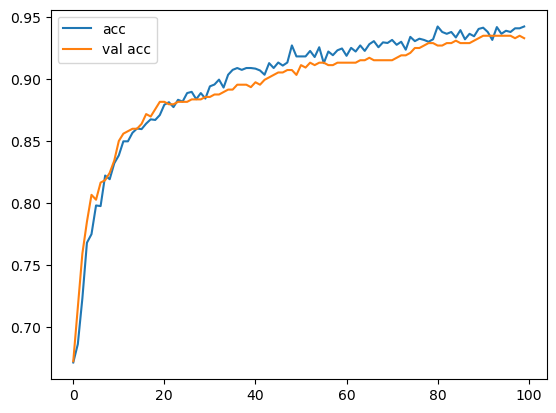

In [17]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend();

16/16 [==============================] - 3s 111ms/step


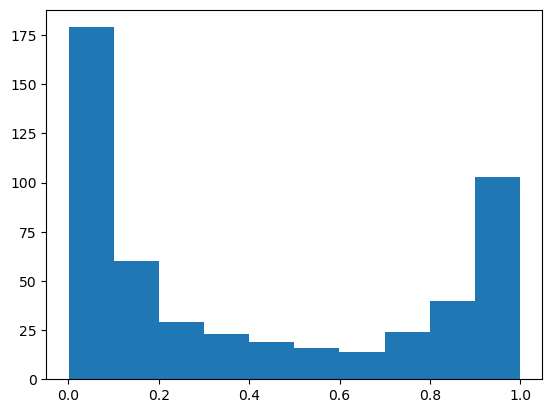

In [19]:
test_preds = model_t.predict(test_data)

plt.hist(test_preds);

In [21]:
model_t.save_weights('weights.h5')